In [1]:
#Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
"""
    Perform gradient descent to optimize parameters w and b for linear regression.

    Parameters:
    x (numpy.ndarray): Input data points.
    y (numpy.ndarray): Target values.
    w (float): Current weight parameter.
    b (float): Current bias parameter.
    learning_rate (float): The learning rate for gradient descent.

    Returns:
    float: Updated weight parameter.
    float: Updated bias parameter.
"""
def gradient_descend(x, y, w, b, learning_rate): 
    dldw = 0.0   
    dldb = 0.0   
    N = x.shape[0]   # Number of datapoints in x
    # loss function = (y-(wx+b)))**2
    for xi, yi in zip(x,y): 
       # Partial derivative of loss function respect to w
       dldw += -2*xi*(yi-(w*xi+b))   
       # Partial derivative of loss function respect to b
       dldb += -2*(yi-(w*xi+b))      
    
    # Make an update to the w parameter 
    w = w - learning_rate*(1/N)*dldw
    b = b - learning_rate*(1/N)*dldb
    return w, b 

In [3]:
"""
    Predicts the output values for new input data points using trained parameters.

    Parameters:
    trained_w (float): Trained weight parameter.
    trained_b (float): Trained bias parameter.
"""
def predict(trained_w, trained_b):
    # Ask the user for new input data points
    num_points = int(input("Enter the number of new data points: "))
    new_x = []
    for i in range(num_points):
        data_point = float(input(f"Enter value for data point {i + 1}: "))
        new_x.append([data_point])
    new_x = np.array(new_x)

    # Make predictions for new input data
    predictions = trained_w * new_x + trained_b
    print("Predictions:", predictions)

In [4]:
# Define the standardize_features function
def standardize_features(features):
    mean = np.mean(features, axis=0)
    std = np.std(features, axis=0)
    standardized_features = (features - mean) / std
    return standardized_features

In [5]:
#===================================================================================#
data = pd.read_csv("../../DataSets/Housing/data.csv")
# Extract features and target
features = data['bedrooms'].values
target = data['price'].values

In [6]:
# Standardize the features
standardized_features = standardize_features(features)

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(standardized_features, target, test_size=0.2, random_state=42)

In [7]:
# Initialize parameters, learning rate, and losses
w = np.zeros(x_train.shape[0])  # Initialize weights with zeros
b = 0.0 
learning_rate = 0.0001
losses = []

In [8]:
# Training loop
for epoch in range(10000): 
    w,b = gradient_descend(x_train,y_train,w,b,learning_rate)
    yhat = w*x_train + b
    loss = np.divide(np.sum((y_train-yhat)**2, axis=0), x_train.shape[0]) 
    losses.append(loss)  # Store the loss for this epoch   
    print(f'{epoch} loss is {loss}, paramters w:{w}, b:{b}')

0 loss is 438821766862.8004, paramters w:[22.43374946 22.43374946 22.43374946 ... 22.43374946 22.43374946
 22.43374946], b:[108.96965377 108.96965377 108.96965377 ... 108.96965377 108.96965377
 108.96965377]
1 loss is 438698051883.3041, paramters w:[44.86325544 44.86325544 44.86325544 ... 44.86325544 44.86325544
 44.86325544], b:[217.91756351 217.91756351 217.91756351 ... 217.91756351 217.91756351
 217.91756351]
2 loss is 438574386167.07404, paramters w:[67.28851875 67.28851875 67.28851875 ... 67.28851875 67.28851875
 67.28851875], b:[326.84373358 326.84373358 326.84373358 ... 326.84373358 326.84373358
 326.84373358]
3 loss is 438450769694.4916, paramters w:[89.7095402 89.7095402 89.7095402 ... 89.7095402 89.7095402 89.7095402], b:[435.74816829 435.74816829 435.74816829 ... 435.74816829 435.74816829
 435.74816829]
4 loss is 438327202445.9458, paramters w:[112.12632057 112.12632057 112.12632057 ... 112.12632057 112.12632057
 112.12632057], b:[544.63087201 544.63087201 544.63087201 ... 5

KeyboardInterrupt: 

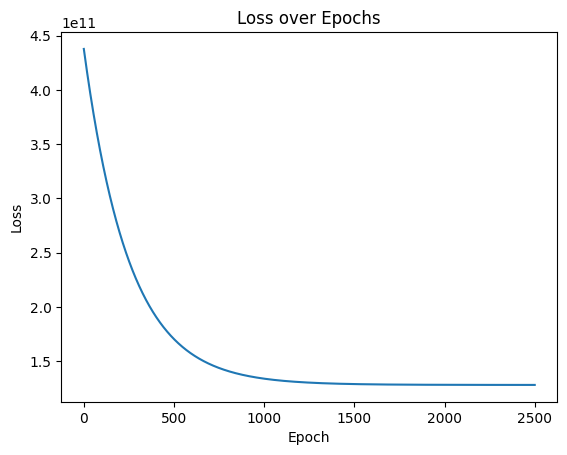

In [39]:
# Plot the loss values
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.show()